# In this exercise, please build a model that predicts whether a customer would purchase an SUV Car Yes or No, using the SUV Dataset attached to this folder.

The Notebook has to include & orders as per the below: 
1. Importing Libraries
2. Reading the Data
3. Cleaning Data
4. EDA
5. Model
6. Evaluation & Conclusion

In [61]:
import pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

What is the Target feature?

Purchased !

In [65]:
df = pd.read_csv('suv_data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [39]:
df = df.drop('User ID', axis=1)


In [58]:
df.columns = df.columns.str.lower()

In [59]:
df.dtypes

gender             object
age                 int64
estimatedsalary     int64
purchased           int64
dtype: object

In [60]:
df.isna().sum()

gender             0
age                0
estimatedsalary    0
purchased          0
dtype: int64

In [64]:
df.duplicated('purchased').sum()

398

EDA

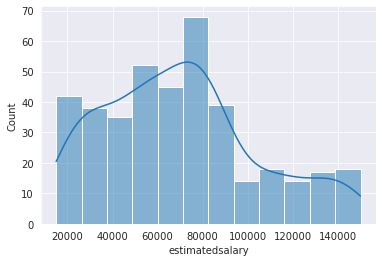

In [62]:
sns.set_style('darkgrid')
sns.histplot(x= 'estimatedsalary', data = df, kde = True );

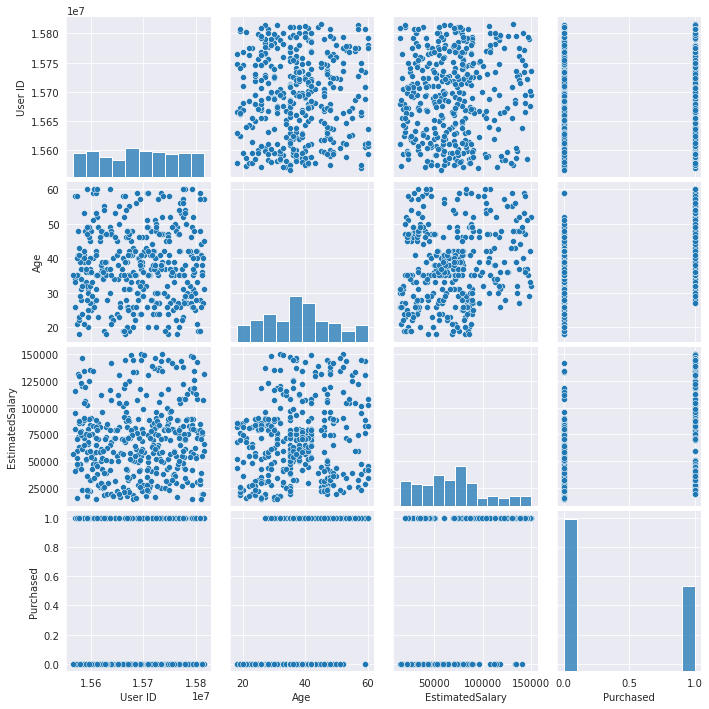

In [69]:
sns.pairplot(data = df)

In [89]:
df_clean = pd.get_dummies(df, drop_first = True)
#X = df_clean.drop(columns = 'Gender')
X = df_clean.drop('purchased',axis=1)
y = df_clean.purchased
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [90]:
X

,User ID,Age,EstimatedSalary,Gender_Male
0,15624510,19,19000,1
1,15810944,35,20000,1
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,1
...,...,...,...,...
395,15691863,46,41000,0
396,15706071,51,23000,1
397,15654296,50,20000,0
398,15755018,36,33000,1


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

In [94]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in X_train.columns:
    if X_train.loc[:, col].dtype != 'O':
#         print(col)
#         X_train.loc[:, col] = scaler.fit_transform(X_train.loc[:, col].values.reshape(-1, 1))
#         X_test.loc[:, col] = scaler.fit_transform(X_test.loc[:, col].values.reshape(-1, 1))
        
        scaler.fit(X_train.loc[:, col].values.reshape(-1, 1))
        X_train.loc[:, col] = scaler.transform(X_train.loc[:, col].values.reshape(-1, 1))
        X_test.loc[:, col] = scaler.transform(X_test.loc[:, col].values.reshape(-1, 1))


In [96]:
X_test.head(1)

,User ID,Age,EstimatedSalary,Gender_Male
399,-1.37732,1.081606,-0.954945,-0.981423


In [99]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [100]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
round(lr_model.score(X_test, y_test) * 100)
y_pred = lr_model.predict(X_test)
r2_score(y_test, y_pred)
print("The Linear Regression Model Performance on Test set is {:.2f} % using MAPE".format(mean_absolute_percentage_error(y_test, y_pred)*100))

The Linear Regression Model Performance on Test set is 28147497671065612.00 % using MAPE
